# Figure 3: Phenomenology of reverse-phi in walking flies

In [1]:
from setup_nb import *

### Data

In [2]:
# General preprocessing (filtering + left-right subtraction):

def preprocess(data):
    
    # First, we take the difference between left- and right-directed stimuli and apply a soft low-pass filter:
    data = preprocess_standard(data, filter=None)
    
    # For evaluation, we tange the mean rotation over a certain range:
    evald = groupexcept(data, 'time').aggregate(rangemean, r=slice(1.5, 3.0))
    
    return data, evald

In [3]:
data_phi, evald_phi = preprocess(pd.read_hdf("../data/behav_phi.data"))
data_rphi, evald_rphi = preprocess(pd.read_hdf("../data/behav_rphi.data"))

data_highres, evald_highres = preprocess(pd.read_hdf("../data/highresolution.data"))

In [4]:
data_phi.head()

rotation  \
genotype             flyname              velocity lambda time              
F1 X154 x GMRSS00324 20141014_fly19_exp01 16.0     30.0   0.00   5.061143   
                                                          0.05   5.061143   
                                                          0.10   4.861128   
                                                          0.15  12.328827   
                                                          0.20   0.205664   

                                                                 forward  
genotype             flyname              velocity lambda time            
F1 X154 x GMRSS00324 20141014_fly19_exp01 16.0     30.0   0.00  1.273541  
                                                          0.05  1.273541  
                                                          0.10  1.255370  
                                                          0.15  1.290292  
                                                          0.20  1.243801

In [5]:
evald_phi.head()

rotation  \
genotype             flyname              velocity lambda               
F1 X154 x GMRSS00324 20141014_fly19_exp01 16.0     30.0     86.583666   
                                                   90.0     48.685103   
                                          32.0     30.0    121.753067   
                                                   90.0     97.475439   
                                          64.0     30.0    166.410940   

                                                            forward  
genotype             flyname              velocity lambda            
F1 X154 x GMRSS00324 20141014_fly19_exp01 16.0     30.0    1.307684  
                                                   90.0    1.234065  
                                          32.0     30.0    1.222568  
                                                   90.0    1.190915  
                                          64.0     30.0    1.167249

In [6]:
data_highres.head()

rotation  \
genotype             flyname              velocity lambda time              
F1 X154 x GMRSS00324 20141014_fly19_exp01 16.0     30.0   0.00 -14.028743   
                                                          0.01 -14.028743   
                                                          0.02 -18.562925   
                                                          0.03 -20.177467   
                                                          0.04 -24.069349   

                                                                 forward  
genotype             flyname              velocity lambda time            
F1 X154 x GMRSS00324 20141014_fly19_exp01 16.0     30.0   0.00  0.891260  
                                                          0.01  0.891260  
                                                          0.02  1.082504  
                                                          0.03  1.033409  
                                                          0.04  1.007641

In [7]:
gt = ['F1 X154 x GMRSS00324']

In [8]:
d1, d2 = data_phi.reset_index(), data_rphi.reset_index()

print "Phi condition:"
for g in gt:
    n = len(d1[d1.genotype == g].flyname.unique())
    print "{0}: N={1}".format(g, n)
    
print "Reverse Phi condition:"
for g in gt:
    n = len(d2[d2.genotype == g].flyname.unique())
    print "{0}: N={1}".format(g, n)

Phi condition:
F1 X154 x GMRSS00324: N=12
Reverse Phi condition:
F1 X154 x GMRSS00324: N=11


### Generic plot

In [93]:
def make_inset(ax):
    
    data = data_highres.reset_index()
    data = data[(data["velocity"] == 256) & (data["lambda"].isin([90])) & (data.genotype.isin(gt))]
#     data = data[(data["velocity"] == 256) & (data.genotype.isin(gt))]

    sb.tsplot(data, time="time", unit="flyname", condition="lambda", value="rotation",
              ci=False, color=gt_colors, legend=False, err_kws={'edgecolor': 'none'},
              ax=ax)
    
    ax.set_xlim([0.95, 1.49])
    ax.set_ylim([-25, 30])

    ax.set_ylabel("")
    ax.set_xlabel("")
    
    ax.set_yticks([])
    ax.set_xticks([])
    
    ax.plot([0.95, 1.49], [-24, -24], color="black")
    
    ax.axvspan(1.0, 2.0, edgecolor='none', facecolor='gray', zorder=0, alpha=0.075)

    add_refline(ax, horizontal=True)
    
    remove_axis(ax, x=True, y=True)

In [86]:
def make_trace_panel(data, genotypes, lam, vel, ax, ylim=[-200.0, 200.0], legend=False, title=""):
    
    data = data.reset_index()
    data = data[(data["velocity"] == vel) & (data["lambda"].isin(lam)) & (data.genotype.isin(genotypes))]
                
    sb.tsplot(data, time="time", unit="flyname", condition="lambda", value="rotation",
              ci=standard_ci, color=gt_colors, legend=legend, err_kws={'edgecolor': 'none'},
              ax=ax)
    
    ax.set_ylim(ylim)
    ax.set_xlim([0.0, 3.5])
    
    if legend:
        
        hs, ls = ax.get_legend_handles_labels()
        ls = [gt_alias[x] for x in ls]
        
        ax.legend_.remove()
        ax.legend(hs, ls, loc=[0, 0.6], ncol=1)
        ax.legend_.set_title("")
    
    remove_axis(ax, x=True, y=True)
    
    ax.axvspan(1.0, 2.0, edgecolor='none', facecolor='gray', zorder=0, alpha=0.075)

    l = ax.plot([0, 3.5], [0, 0], linestyle="--", zorder=1, color="#444444")
    l[0].set_dashes([1,1])
    
    ax.set_title(title)

In [12]:
def make_summary_panel(data, genotypes, lam, ax, ylim=[-100, 100]):
    
    data = data.reset_index()
    data = data[(data["lambda"].isin(lam)) & (data.genotype.isin(genotypes))]
        
    sb.pointplot("velocity", "rotation", hue="lambda", data=data, palette=gt_colors,
                 scale=0.75, ax=ax, ci=standard_ci)
        
    add_refline(ax, horizontal=True)
    
    ax.tick_params(axis='both', which='major', pad=2)
    
    ax.set_xlabel(u"Pattern speed (°/s)", labelpad=2)
    ax.set_ylabel(u"Turning speed (°/s)", labelpad=2)
    
    ax.legend_.remove()
    
    ax.set_ylim(ylim)
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('center')

    yloc = mpl.ticker.MaxNLocator(5)
    ax.yaxis.set_major_locator(yloc)
    
    ax.set_xticklabels([16, 32, 64, 128, 256])
    
    sb.despine(ax=ax)

In [13]:
def add_sidelabel(ax, label):
    
    ax.yaxis.set_visible(True)
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_ylabel(label)

In [57]:
def behavior_figure():
    
    general_lambda_order = [30.0, 90.0]
    
    off = 0.9
    off_v = -20.3
    rows = [0, 2.4, 4.8, 7.9]
    panelsize = (2, 2)

    fig = sb.plt.figure(figsize=(4.5, 2.6))
    
    ylim = [-150, 375]
    ylim_summary = [-120, 210]

    # Phi Motion:
    height = 24 + off_v
    
    ylim = [-50, 375]

    ax = addaxis(fig, (off + rows[0], height), panelsize, letter="a", nudge=0.0)
    make_trace_panel(data_phi, gt, general_lambda_order, 16.0, ax, legend=True, ylim=ylim)
    ax.set_title(u"16 °/s")
    add_sidelabel(ax, "Phi")
    
    ax = addaxis(fig, (off + rows[1], height), panelsize, letter="")
    make_trace_panel(data_phi, gt, general_lambda_order, 64.0, ax, legend=False, ylim=ylim)
    ax.set_title(u"64 °/s")
    draw_reference(ax, (0.5, 240), (0.5, 75), ("s", u"°/s"), fontsize=5.0, lw=0.8)

    ax = addaxis(fig, (off + rows[2], height), panelsize, letter="")
    make_trace_panel(data_phi, gt, general_lambda_order, 256.0, ax, legend=False, ylim=ylim)
    ax.set_title(u"256 °/s")
    
    ax = addaxis(fig, (off + rows[3], height), panelsize, letter="b", nudge=0.5)
    make_summary_panel(evald_phi, gt, general_lambda_order, ax, ylim=ylim_summary)
    ax.xaxis.set_visible(False)
    
    # RPhi Motion:
    height = 21.5 + off_v
    
    ylim = [-150, 150]

    ax = addaxis(fig, (off + rows[0], height), panelsize, letter="c", nudge=0.0)
    make_trace_panel(data_rphi, gt, general_lambda_order, 16.0, ax, legend=False, ylim=ylim)
    add_sidelabel(ax, "Reverse-phi")
    draw_reference(ax, (0.5, 70), (0.5, 50), ("s", u"°/s"), fontsize=5.0, lw=0.8)

    ax = addaxis(fig, (off + rows[1], height), panelsize, letter="")
    make_trace_panel(data_rphi, gt, general_lambda_order, 64.0, ax, legend=False, ylim=ylim)

    ax = addaxis(fig, (off + rows[2], height), panelsize, letter="")
    make_trace_panel(data_rphi, gt, general_lambda_order, 256.0, ax, legend=False, ylim=ylim)
    ax.plot([0.95, 1.49], [-70, -70], color="black")
    
    # Inset:
    ax = addaxis(fig, (off + rows[1] + 1.9, height + 1.5), (0.9, 0.9), letter="")
    make_inset(ax)

    ax = addaxis(fig, (off + rows[3], height), panelsize, letter="d", nudge=0.5)
    make_summary_panel(evald_rphi, gt, general_lambda_order, ax, ylim=ylim_summary)
    
    fig.set_frameon(False)
    fig.savefig("../output/Fig3.tif", format="tiff", dpi=standard_dpi)

### Plots

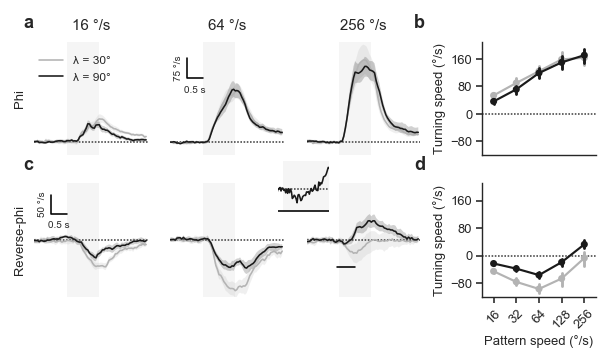

In [94]:
behavior_figure()